In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df_stck = pd.read_feather("resources/stack_overflow.feather")
df_stck['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

**Analysis of variance(ANOVA)**

ANOVA testleri, gruplar arasında farklılık olup olmadığını belirler. Anlamlılık düzeyi 0.2 olarak belirlenir. Bu değer birçok durumda olduğundan daha büyüktür, ancak daha sonra farklı sayıdaki grupları karşılaştırmanın sonuçlarını anlamaya yardımcı olacaktır. Birden fazla gruptaki değerleri karşılaştırmak için pingouin anova yöntemi kullanılacak. Verileri stack_overflow, bağımlı değişken olan dv'yi `converted_comp` ve aralarında hesaplama yapılacak grup sütunu `job_sat` olarak belirlenir. p-değeri, p-unc sütununda saklanır; bu sütun, alfa değerinden yüzde 20 daha küçük olan 0.0013 noktasıdır. Bu, iş tatmini kategorilerinden en az ikisinin ücret düzeyleri arasında önemli farklılıklar olduğu anlamına gelir, ancak bu bize hangi iki kategori olduğunu söylemez.

In [2]:
import pingouin

pingouin.pairwise_tests(data=df_stck, dv='converted_comp', between='job_sat', padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


**Pairwise tests**

Hangi kategorilerin farklı olduğunu belirlemek için, beş memnuniyet kategorisinin tamamını karşılaştırarak her bir çift sırayla test edilmelidir. Beş maddelik bir setten iki madde seçmenin on yolu vardır, dolayısıyla gerçekleştirilmesi gereken on test vardır.
Anlamlılık düzeyi 0.2'dir.

- $\mu_{\text{very\_dissatisfied}} \neq \mu_{\text{slightly\_dissatisfied}}$     

- $\mu_{\text{very\_dissatisfied}} \neq \mu_{\text{neither}}$

- $\mu_{\text{very\_dissatisfied}} \neq \mu_{\text{slightly\_satisfied}}$

- $\mu_{\text{very\_dissatisfied}} \neq \mu_{\text{very\_satisfied}}$

- $\mu_{\text{very\_dissatisfied}} \neq \mu_{\text{slightly\_dissatisfied}}$

- $\mu_{\text{slightly\_dissatisfied}} \neq \mu_{\text{slightly\_satisfied}}$

- $\mu_{\text{slightly\_dissatisfied}} \neq \mu_{\text{very\_satisfied}}$

- $\mu_{\text{neither}} \neq \mu_{\text{slightly\_satisfied}}$

- $\mu_{\text{neither}} \neq \mu_{\text{very\_satisfied}}$

- $\mu_{\text{slightly\_satisfied}} \neq \mu_{\text{very\_satisfied}}$

In [3]:
alpha = 0.1
df_stck['age_cat'].value_counts(normalize=True)

age_cat
Under 30       0.535604
At least 30    0.464396
Name: proportion, dtype: float64

In [2]:
p_hat = (df_stck['age_cat'] == 'Under 30').mean()
p_hat

0.5356037151702786

In [3]:
p_0 = 0.5
n = len(df_stck)
n

2261

In [6]:
import numpy as np

pay = p_hat - p_0
payda = np.sqrt(p_0 * (1 - p_0) / n)
z_score = pay / payda 
z_score

3.385911440783663

**Calculating the p-value**

In [7]:
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(z_score))
p_value

0.0007094227368100725

In [8]:
p_value < alpha

True

In [9]:
alpha = 0.05

In [10]:
df_stck.groupby('age_cat')['hobbyist'].value_counts()

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: count, dtype: int64

In [11]:
n_hobbyist = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])

from statsmodels.stats.proportion import proportions_ztest

z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows, 
                                     alternative='two-sided')

(z_score, p_value)

(-4.223691463320559, 2.403330142685068e-05)

In [12]:
import pingouin

expected, observed, stats = pingouin.chi2_independence(data=df_stck, x='hobbyist', 
                                                       y='age_cat', 
                                                       correction=False)

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.839570,1.0,0.000024,0.088826,0.988205
1,cressie-read,0.666667,17.818114,1.0,0.000024,0.088773,0.988126
2,log-likelihood,0.000000,17.802653,1.0,0.000025,0.088734,0.988069
3,freeman-tukey,-0.500000,17.815060,1.0,0.000024,0.088765,0.988115
4,mod-log-likelihood,-1.000000,17.848099,1.0,0.000024,0.088848,0.988236
5,neyman,-2.000000,17.976656,1.0,0.000022,0.089167,0.988694


In [13]:
df_stck['age_cat'].value_counts()

age_cat
Under 30       1211
At least 30    1050
Name: count, dtype: int64

In [14]:
df_stck['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

In [15]:
props = df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

C:\Users\cansimsek\AppData\Local\Temp\ipykernel_15356\384739958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props = df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)


job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64

In [16]:
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


<Axes: xlabel='job_sat'>

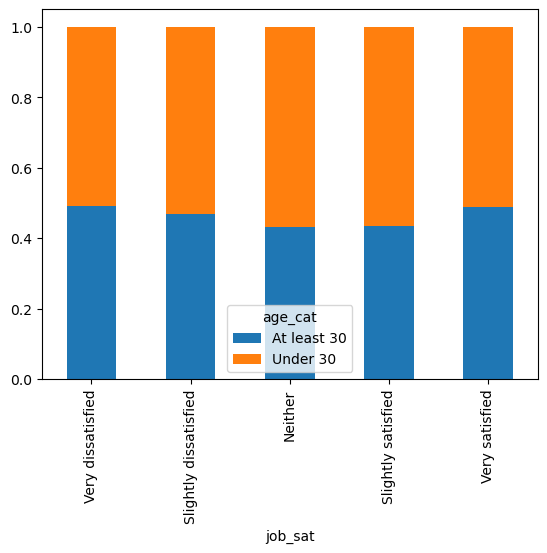

In [17]:
wide_props.plot(kind='bar', stacked=True)

In [18]:
expected, observed, stats = pingouin.chi2_independence(data=df_stck, x='job_sat', 
                                                       y='age_cat')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


<Axes: xlabel='age_cat'>

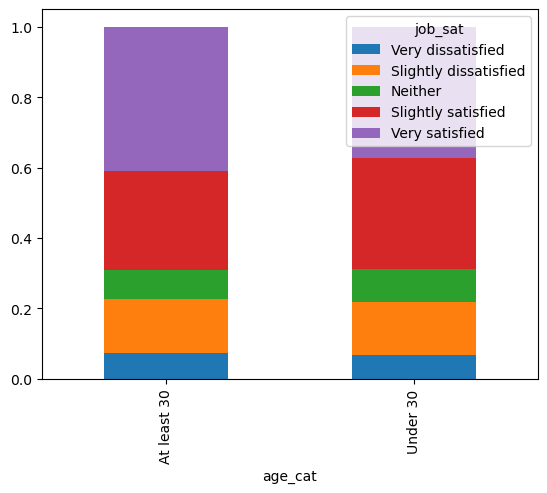

In [19]:
props = df_stck.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked=True)

In [20]:
expected, observed, stats = pingouin.chi2_independence(data=df_stck, x='age_cat',
                                                       y='job_sat')
stats[stats['test'] == 'pearson']

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,5.552373,4.0,0.235164,0.049555,0.437417


In [21]:
purple_link_counts = df_stck['purple_link'].value_counts()
purple_link_counts

purple_link
Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: count, dtype: int64

In [22]:
purple_link_counts = purple_link_counts.rename_axis('purple_link').\
                                        reset_index(name='n').\
                                        sort_values('purple_link')

purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [23]:
hypothesized = pd.DataFrame({
    'purple_link' : ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
    'prop' : [1/6, 1/6, 1/2, 1/6]
}
)
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


In [24]:
#  Kategoriye göre varsayılan sayılar
# Purple_link dağılımını görselleştirmek için, 
# her bir yanıt için varsayılan sayıların bulunması yardımcı olacaktır. 
# Bu sayılar, varsayılan oranların örneklemdeki 
# toplam gözlem sayısıyla çarpılmasıyla hesaplanır.
n_total = len(df_stck)
hypothesized['n'] = hypothesized['prop'] * n_total
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


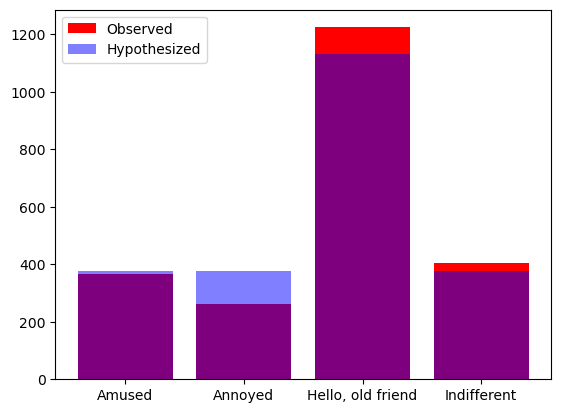

In [25]:
import matplotlib.pyplot as plt

plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='blue', label='Hypothesized')
plt.legend()